In [1]:
#GPU Test
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
#Display Configuration for Jupyter Notebook
import pandas as pd
from IPython.display import display

pd.options.display.max_columns = None

In [4]:
#Importing Pacakges
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from math import isnan

data = pd.read_csv("scrapedData.csv")
data

,Year,Team,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Gls,Sh,SoT,SoT%,G/Sh,G/SoT,Dist,FK,PK,PKatt,npxG,npxG/Sh,G-xG,np:G-xG,SoTA,Saves,Save%,CS,PSxG,PSxG+/-,PKA,PKsv,PKm,Cmp,Att,Cmp%,Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,AvgDist
0,2019,Crystal Palace,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,1.0,1.2,44.0,25286.0,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,NaN,1.0,10.0,2.0,20.0,0.10,0.50,14.6,1.0,0.0,0.0,1.0,0.10,0.0,0.0,2.0,2.0,100.0,1.0,0.3,0.3,0.0,0.0,0.0,8.0,15.0,53.3,4.0,46.7,36.5,16.0,2.0,12.5,1.0,15.7
1,2019,Crystal Palace,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,2.7,0.5,50.0,60033.0,Martin Ødegaard,4-3-3,Darren England,Match Report,NaN,4.0,19.0,7.0,36.8,0.21,0.57,13.0,0.0,0.0,0.0,2.7,0.16,1.3,1.3,2.0,1.0,0.0,0.0,0.5,-0.5,0.0,0.0,0.0,5.0,13.0,38.5,3.0,43.5,37.3,6.0,0.0,0.0,1.0,17.0
2,2019,Crystal Palace,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,1.3,0.3,57.0,10423.0,Martin Ødegaard,4-3-3,Craig Pawson,Match Report,NaN,3.0,14.0,6.0,42.9,0.21,0.50,14.8,0.0,0.0,0.0,1.3,0.10,1.7,1.7,1.0,1.0,100.0,1.0,0.1,0.1,0.0,0.0,0.0,5.0,13.0,38.5,2.0,39.1,33.6,12.0,0.0,0.0,0.0,7.0
3,2019,Crystal Palace,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.6,0.8,71.0,60164.0,Martin Ødegaard,4-3-3,Jarred Gillett,Match Report,NaN,2.0,22.0,8.0,36.4,0.09,0.25,15.5,1.0,0.0,0.0,2.6,0.12,-0.6,-0.6,3.0,2.0,66.7,0.0,1.1,0.1,0.0,0.0,0.0,3.0,10.0,30.0,5.0,31.8,30.8,10.0,2.0,20.0,0.0,14.5
4,2019,Crystal Palace,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.4,0.4,59.0,60012.0,Martin Ødegaard,4-3-3,Robert Jones,Match Report,NaN,2.0,22.0,8.0,36.4,0.09,0.25,16.3,1.0,0.0,0.0,2.4,0.12,-0.4,-0.4,3.0,2.0,66.7,0.0,0.2,-0.8,0.0,0.0,0.0,3.0,13.0,23.1,9.0,40.9,37.6,9.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,2019,Crystal Palace,2020-07-12,14:15,Premier League,Matchweek 35,Sun,Away,L,0,2,Aston Villa,1.2,1.7,55.0,NaN,Luka Milivojević,4-1-4-1,Martin Atkinson,Match Report,NaN,0.0,9.0,5.0,55.6,0.00,0.00,12.0,0.0,0.0,0.0,1.2,0.13,-1.2,-1.2,9.0,7.0,77.8,0.0,2.9,0.9,0.0,0.0,0.0,6.0,14.0,42.9,14.0,34.5,31.2,24.0,4.0,16.7,2.0,10.4
3582,2019,Crystal Palace,2020-07-16,20:15,Premier League,Matchweek 36,Thu,Home,L,0,2,Manchester Utd,0.6,2.2,41.0,NaN,Luka Milivojević,4-4-2,Graham Scott,Match Report,NaN,0.0,13.0,5.0,38.5,0.00,0.00,19.9,1.0,0.0,0.0,0.6,0.05,-0.6,-0.6,5.0,3.0,60.0,0.0,2.1,0.1,0.0,0.0,0.0,1.0,18.0,5.6,4.0,52.6,41.2,14.0,0.0,0.0,0.0,NaN
3583,2019,Crystal Palace,2020-07-20,20:15,Premier League,Matchweek 37,Mon,Away,L,0,2,Wolves,0.4,1.5,47.0,NaN,Scott Dann,4-4-2,Peter Bankes,Match Report,NaN,0.0,7.0,3.0,42.9,0.00,0.00,19.7,1.0,0.0,0.0,0.4,0.06,-0.4,-0.4,5.0,3.0,60.0,0.0,1.7,-0.3,0.0,0.0,0.0,2.0,10.0,20.0,5.0,20.0,26.8,13.0,0.0,0.0,3.0,26.7
3584,2019,Crystal Palace,2020-07-26,16:00,Premier League,Matchweek 38,Sun,Home,D,1,1,Tottenham,0.8,0.3,48.0,NaN,Scott Dann,4-4-2,Andre Marriner,Match Report,NaN,1.0,13.0,2.0,15.4,0.08,0.50,13.8,0.0,0.0,0.0,0.8,0.06,0.2,0.2,2.0,1.0,50.0,0.0,0.4,-0.6,0.0,0.0,0.0,3.0,11.0,27.3,4.0,52.9,40.9,11.0,0.0,0.0,0.0,10.0


In [5]:
#Preprocessing
data = pd.read_csv("scrapedData.csv")
data = data.drop(["Day", "Match Report", "Notes", "Comp", "Formation", "Referee", "Attendance", "Time", "AvgDist", "Dist"], axis=1)
nanRows = data[data.isna().any(axis=1)]

pd.concat([data, nanRows]).drop_duplicates(keep=False)

for i in range(len(data)):
    try:
        if isnan(data.loc[i]["Result"]) or isnan(data.loc[i]["Round"]):
            data = data.drop([i], axis=0)
    except TypeError:
        continue

data["Date"] = pd.to_datetime(data["Date"])
data["Date"] = data["Date"].dt.dayofweek
data["Opponent"] = data["Opponent"].astype("category")
    
data["Round"] = [i.split(" ")[-1] if not "Matchweek" in i else i for i in data["Round"]]
data["Venue"] = [0 if i=="Home" else 1 for i in data["Venue"]]
data["Result"] = [0 if i=="L" else 0 if i=="D" else 1 if i =="W" else 1 for i in data["Result"]]
data["Captain"] = data["Captain"].astype("category")

#One-Hot
#Formation, referee, team, opponent

X = data.drop("Result", axis=1)
Y = data["Result"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=33)

onehot_cols = ["Team", "Opponent", "Captain", "Round"]

ct = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), onehot_cols)
    ]
)

ct.fit(X, Y)

x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

scaler = StandardScaler(with_mean=False)

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

x_train = x_train.toarray()
x_test = x_test.toarray()

data

,Year,Team,Date,Round,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Captain,Gls,Sh,SoT,SoT%,G/Sh,G/SoT,FK,PK,PKatt,npxG,npxG/Sh,G-xG,np:G-xG,SoTA,Saves,Save%,CS,PSxG,PSxG+/-,PKA,PKsv,PKm,Cmp,Att,Cmp%,Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA
0,2019,Crystal Palace,4,Matchweek 1,1,1,2.0,0.0,Crystal Palace,1.0,1.2,44.0,Martin Ødegaard,1.0,10.0,2.0,20.0,0.10,0.50,1.0,0.0,0.0,1.0,0.10,0.0,0.0,2.0,2.0,100.0,1.0,0.3,0.3,0.0,0.0,0.0,8.0,15.0,53.3,4.0,46.7,36.5,16.0,2.0,12.5,1.0
1,2019,Crystal Palace,5,Matchweek 2,0,1,4.0,2.0,Leicester City,2.7,0.5,50.0,Martin Ødegaard,4.0,19.0,7.0,36.8,0.21,0.57,0.0,0.0,0.0,2.7,0.16,1.3,1.3,2.0,1.0,0.0,0.0,0.5,-0.5,0.0,0.0,0.0,5.0,13.0,38.5,3.0,43.5,37.3,6.0,0.0,0.0,1.0
2,2019,Crystal Palace,5,Matchweek 3,1,1,3.0,0.0,Bournemouth,1.3,0.3,57.0,Martin Ødegaard,3.0,14.0,6.0,42.9,0.21,0.50,0.0,0.0,0.0,1.3,0.10,1.7,1.7,1.0,1.0,100.0,1.0,0.1,0.1,0.0,0.0,0.0,5.0,13.0,38.5,2.0,39.1,33.6,12.0,0.0,0.0,0.0
3,2019,Crystal Palace,5,Matchweek 4,0,1,2.0,1.0,Fulham,2.6,0.8,71.0,Martin Ødegaard,2.0,22.0,8.0,36.4,0.09,0.25,1.0,0.0,0.0,2.6,0.12,-0.6,-0.6,3.0,2.0,66.7,0.0,1.1,0.1,0.0,0.0,0.0,3.0,10.0,30.0,5.0,31.8,30.8,10.0,2.0,20.0,0.0
4,2019,Crystal Palace,2,Matchweek 5,0,1,2.0,1.0,Aston Villa,2.4,0.4,59.0,Martin Ødegaard,2.0,22.0,8.0,36.4,0.09,0.25,1.0,0.0,0.0,2.4,0.12,-0.4,-0.4,3.0,2.0,66.7,0.0,0.2,-0.8,0.0,0.0,0.0,3.0,13.0,23.1,9.0,40.9,37.6,9.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,2019,Crystal Palace,1,Matchweek 34,0,0,2,3,Chelsea,1.5,1.9,43.0,Luka Milivojević,2.0,13.0,4.0,30.8,0.15,0.50,0.0,0.0,0.0,1.5,0.12,0.5,0.5,6.0,3.0,50.0,0.0,2.7,-0.3,0.0,0.0,0.0,5.0,18.0,27.8,6.0,46.2,32.3,18.0,1.0,5.6,1.0
3581,2019,Crystal Palace,6,Matchweek 35,1,0,0,2,Aston Villa,1.2,1.7,55.0,Luka Milivojević,0.0,9.0,5.0,55.6,0.00,0.00,0.0,0.0,0.0,1.2,0.13,-1.2,-1.2,9.0,7.0,77.8,0.0,2.9,0.9,0.0,0.0,0.0,6.0,14.0,42.9,14.0,34.5,31.2,24.0,4.0,16.7,2.0
3582,2019,Crystal Palace,3,Matchweek 36,0,0,0,2,Manchester Utd,0.6,2.2,41.0,Luka Milivojević,0.0,13.0,5.0,38.5,0.00,0.00,1.0,0.0,0.0,0.6,0.05,-0.6,-0.6,5.0,3.0,60.0,0.0,2.1,0.1,0.0,0.0,0.0,1.0,18.0,5.6,4.0,52.6,41.2,14.0,0.0,0.0,0.0
3583,2019,Crystal Palace,0,Matchweek 37,1,0,0,2,Wolves,0.4,1.5,47.0,Scott Dann,0.0,7.0,3.0,42.9,0.00,0.00,1.0,0.0,0.0,0.4,0.06,-0.4,-0.4,5.0,3.0,60.0,0.0,1.7,-0.3,0.0,0.0,0.0,2.0,10.0,20.0,5.0,20.0,26.8,13.0,0.0,0.0,3.0


In [6]:
#Making and Compiling the Model

model = Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1], )))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
opt = Adam(learning_rate=0.001)

model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [14]:
# Train model, 64 batch size, 10 epochs, early stopping
history = model.fit(x_train, y_train, batch_size=16, epochs=10, callbacks=[callback], validation_data=(x_test, y_test))

Epoch 1/10
179/179 [==============================] - 1s 5ms/step - loss: 0.4680 - accuracy: 0.7736 - val_loss: 0.7230 - val_accuracy: 0.6120
Epoch 2/10
179/179 [==============================] - 1s 5ms/step - loss: 0.4463 - accuracy: 0.7914 - val_loss: 0.7479 - val_accuracy: 0.6183
Epoch 3/10
179/179 [==============================] - 1s 4ms/step - loss: 0.4319 - accuracy: 0.7957 - val_loss: 0.7629 - val_accuracy: 0.6151
Epoch 4/10
179/179 [==============================] - 1s 4ms/step - loss: 0.4161 - accuracy: 0.8072 - val_loss: 0.7792 - val_accuracy: 0.6151


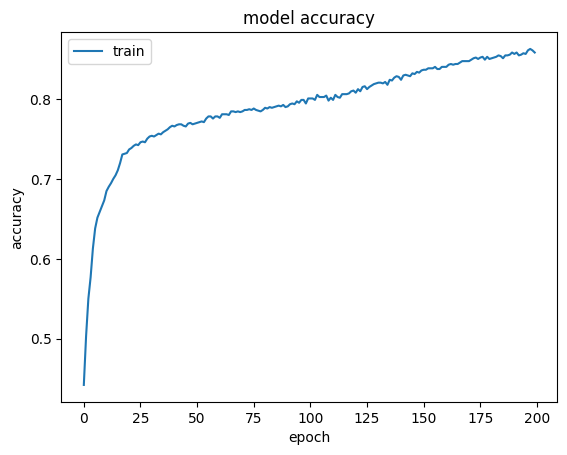

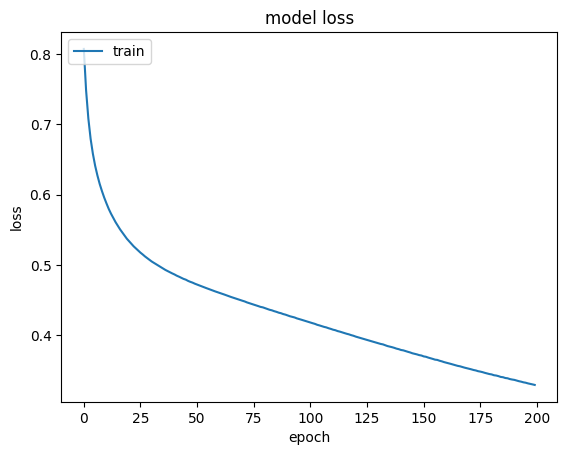

In [8]:
#Display History For Accuracy and Loss
import matplotlib.pyplot
%matplotlib inline

matplotlib.pyplot.plot(history.history['accuracy'])
matplotlib.pyplot.title('model accuracy')
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend(['train', 'test'], loc='upper left')
matplotlib.pyplot.show()


matplotlib.pyplot.plot(history.history['loss'])
matplotlib.pyplot.title('model loss')
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend(['train', 'test'], loc='upper left')
matplotlib.pyplot.show()